In [11]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
from IPython.display import display

from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [89]:
#Leyendo datos
df= pd.read_csv("C:/Users/LUISPEDRO/Desktop/Universidad Del Valle/Semestre 7/InteligenciaArtificial/Lab2/Walmart.csv")
#Ordenando datos por fecha


## Exploración ligera de datos

In [91]:
#Explorando un poco el dataframe... se ven 8 columnas con 6435 entradas
display(df.head())
print("Hay ", df.shape[0], " entradas")




,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Hay  6435  entradas


In [92]:
#Será mas facil trabajar con los das, meses y anios por separado
#El dia de la semana se trabaja desde 0 a 6 "Lunes a domingo"
df.Date=pd.to_datetime(df.Date)

df['diaSemanal'] = df.Date.dt.weekday
df['mes'] = df.Date.dt.month
df['anio'] = df.Date.dt.year

df.drop(['Date'], axis=1, inplace=True)#,'month'

target = 'Weekly_Sales'
features = [i for i in df.columns if i not in [target]]
original_df = df.copy(deep=True)

df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,diaSemanal,mes,anio
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [101]:
#Descripción General de los datos
display(df.describe())

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,diaSemanal,mes,anio
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,3.573427,6.475524,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,1.426581,3.321797,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,6.000000,12.000000,2012.000000


## Preprocesamiento

In [94]:
#Ver si hay NaN, o elementos vacíos. (no hay)
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['NaN'])
print(nvc)

              NaN
Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
diaSemanal      0
mes             0
anio            0


## Remover Atípicos

In [128]:

df1 = df.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())

a = int(format(df3.shape[0]))
b =int(format(df1.shape[0]))

print("Se removieron", a-b, " entradas")


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,diaSemanal,mes,anio
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


Se removieron 482  entradas


## Test y train

In [137]:

m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)
Train_X.reset_index(drop=True,inplace=True)



Original set  --->  (6435, 9) (6435,) 
Training set  --->  (4504, 9) (4504,) 
Testing set   --->  (1931, 9)  (1931,)


In [138]:
std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,diaSemanal,mes,anio
count,4.504000e+03,4.504000e+03,4.504000e+03,4.504000e+03,4.504000e+03,4.504000e+03,4.504000e+03,4.504000e+03,4.504000e+03
mean,1.429683e-18,-3.595160e-16,3.440114e-16,-2.100648e-16,1.263298e-16,6.784587e-16,2.565789e-16,-2.135158e-16,1.324889e-13
std,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00,1.000111e+00
min,-1.697930e+00,-2.802571e-01,-2.988258e+00,-1.920537e+00,-1.161537e+00,-2.215222e+00,-2.512459e+00,-1.675263e+00,-1.205593e+00
25%,-8.483390e-01,-2.802571e-01,-7.219761e-01,-9.246293e-01,-1.018893e+00,-5.915498e-01,2.960328e-01,-7.699618e-01,-1.205593e+00
50%,1.251819e-03,-2.802571e-01,1.122282e-01,1.862743e-01,2.779215e-01,-7.373295e-02,2.960328e-01,1.353396e-01,4.469270e-02
75%,8.508427e-01,-2.802571e-01,7.686423e-01,8.176668e-01,1.041628e+00,3.127536e-01,2.960328e-01,7.388738e-01,1.294978e+00
max,1.700434e+00,3.568152e+00,2.135675e+00,2.410251e+00,1.404902e+00,3.377844e+00,1.700279e+00,1.644175e+00,1.294978e+00



                                          Standardardization on Testing set                                          


,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,diaSemanal,mes,anio
count,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000
mean,0.004172,-0.037116,-0.001039,0.010543,-0.022400,-0.022150,-0.011578,-0.076413,0.003254
std,1.010454,0.936506,0.999315,0.986396,0.995081,1.018228,1.005396,1.005978,0.988285
min,-1.697930,-0.280257,-3.400211,-1.829408,-1.161537,-2.215222,-2.512459,-1.675263,-1.205593
25%,-0.848339,-0.280257,-0.711406,-0.914866,-1.014399,-0.612992,0.296033,-0.769962,-1.205593
50%,0.001252,-0.280257,0.105182,0.205802,0.258879,-0.074805,0.296033,-0.166428,0.044693
75%,0.928078,-0.280257,0.781651,0.835025,1.021241,0.327227,0.296033,0.738874,1.294978
max,1.700434,3.568152,2.139469,2.410251,1.405372,3.377844,1.700279,1.644175,1.294978


In [142]:
Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,2,replace=False)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1054548.8093183902


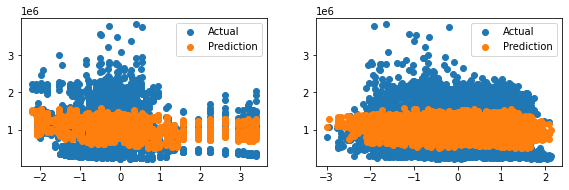



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.14697592738429555
Residual Sum of Squares (RSS) on Training set  ---> 1227022616747916.0
Mean Squared Error (MSE) on Training set       ---> 272429533025.73624
Root Mean Squared Error (RMSE) on Training set ---> 521947.8259613084

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.14388550124925037
Residual Sum of Squares (RSS) on Training set  ---> 522220926342485.2
Mean Squared Error (MSE) on Training set       ---> 270440666153.5397
Root Mean Squared Error (RMSE) on Training set ---> 520039.1006006565

--------------------Residual Plots--------------------


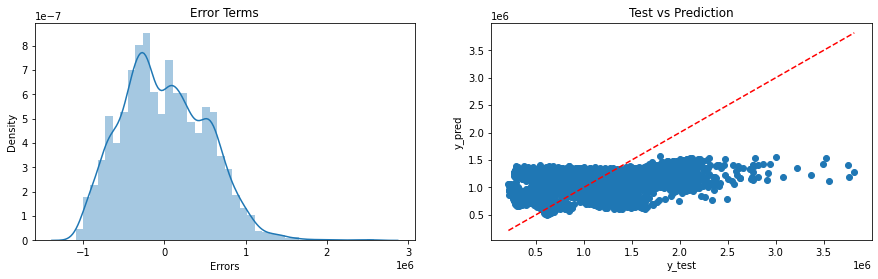

In [145]:
MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

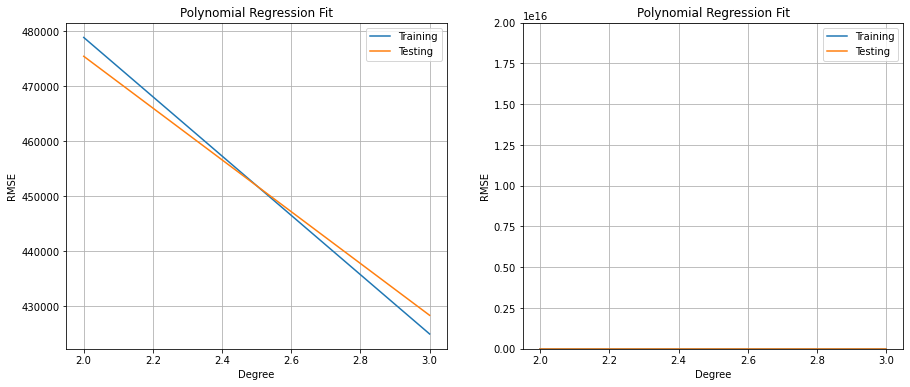

In [146]:
Trr=[]; Tss=[]
n_degree=4

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)
    
    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([0,2e16])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-201537.35969555    4733.64903439  -22752.49257666   43090.93762371
  -73501.69631015  -46476.138959     -9890.44400291   33404.65893673
  -48732.69152257]
The Intercept of the Regresion Model was found to be  1054548.8093183902


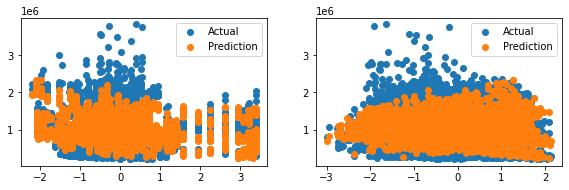



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.2819256854106086
Residual Sum of Squares (RSS) on Training set  ---> 1032905697262640.4
Mean Squared Error (MSE) on Training set       ---> 229330749836.28784
Root Mean Squared Error (RMSE) on Training set ---> 478884.9024935823

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.284359133691528
Residual Sum of Squares (RSS) on Training set  ---> 436533473825625.56
Mean Squared Error (MSE) on Training set       ---> 226066014409.95624
Root Mean Squared Error (RMSE) on Training set ---> 475463.9990682326

--------------------Residual Plots--------------------


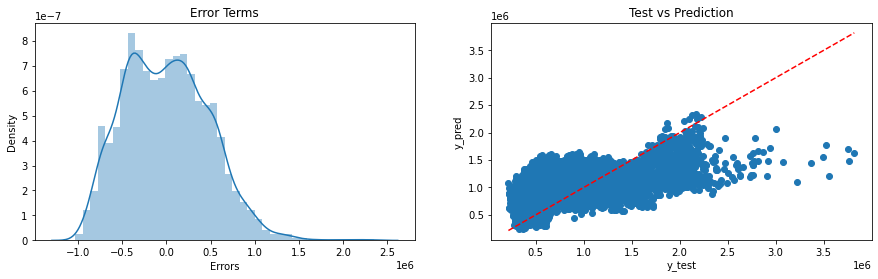

In [147]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)